In [1]:
import pandas as pd 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
data = pd.read_csv("output copy.csv")
data.head()

,precipitationLast6Hours,visibility,barometricPressure,windDirection,relativeHumidity,heatIndex,rawMessage,timestamp,maxTemperatureLast24Hours,elevation,temperature,minTemperatureLast24Hours,precipitationLastHour,precipitationLast3Hours,dewpoint,windChill,windGust,seaLevelPressure,windSpeed,textDescription
0,NaN,16090,102000.0,0.0,54.110084,NaN,KNYC 010551Z AUTO 00000KT 10SM CLR 11/02 A3012...,2022-05-01T05:51:00+00:00,NaN,27,10.6,NaN,NaN,NaN,1.7,NaN,NaN,101900.0,0.00,Clear
1,NaN,9660,101800.0,90.0,96.074595,NaN,KNYC 021033Z AUTO 09003KT 6SM -RA BR BKN015 BK...,2022-05-02T10:33:00+00:00,NaN,27,10.6,NaN,0.01,NaN,10.0,NaN,NaN,NaN,5.40,Light Rain and Fog/Mist
2,NaN,6440,101930.0,110.0,92.842633,NaN,KJFK 040451Z 11009KT 4SM -DZ BR OVC005 09/08 A...,2022-05-04T04:51:00+00:00,NaN,7,9.4,NaN,0.00,NaN,8.3,6.999966,NaN,101930.0,16.56,Light Drizzle and Fog/Mist
3,NaN,16090,101800.0,NaN,38.862553,NaN,KJFK 302051Z 19013KT 10SM CLR 15/01 A3006 RMK ...,2022-04-30T20:51:00+00:00,NaN,7,15.0,NaN,NaN,NaN,1.1,NaN,NaN,101770.0,NaN,Clear
4,NaN,16090,101830.0,NaN,12.164783,NaN,KEWR 301751Z 29013G17KT 10SM CLR 19/M11 A3007 ...,2022-04-30T17:51:00+00:00,NaN,9,19.4,NaN,NaN,NaN,-10.6,NaN,NaN,101830.0,NaN,Clear


In [26]:
data.columns

Index(['precipitationLast6Hours', 'visibility', 'barometricPressure',
       'windDirection', 'relativeHumidity', 'heatIndex', 'rawMessage',
       'timestamp', 'maxTemperatureLast24Hours', 'elevation', 'temperature',
       'minTemperatureLast24Hours', 'precipitationLastHour',
       'precipitationLast3Hours', 'dewpoint', 'windChill', 'windGust',
       'seaLevelPressure', 'windSpeed', 'textDescription'],
      dtype='object')

In [27]:
# check if there is any null values and get rid of those values to make a clean data set
data.isnull().any().any()

True

In [28]:
data.isnull().sum() 

precipitationLast6Hours      957
visibility                     0
barometricPressure            99
windDirection                219
relativeHumidity             104
heatIndex                    983
rawMessage                    50
timestamp                      0
maxTemperatureLast24Hours    997
elevation                      0
temperature                  100
minTemperatureLast24Hours    997
precipitationLastHour        780
precipitationLast3Hours      965
dewpoint                     102
windChill                    937
windGust                     950
seaLevelPressure             214
windSpeed                    145
textDescription               36
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   precipitationLast6Hours    40 non-null     float64
 1   visibility                 997 non-null    int64  
 2   barometricPressure         898 non-null    float64
 3   windDirection              778 non-null    float64
 4   relativeHumidity           893 non-null    float64
 5   heatIndex                  14 non-null     float64
 6   rawMessage                 947 non-null    object 
 7   timestamp                  997 non-null    object 
 8   maxTemperatureLast24Hours  0 non-null      float64
 9   elevation                  997 non-null    int64  
 10  temperature                897 non-null    float64
 11  minTemperatureLast24Hours  0 non-null      float64
 12  precipitationLastHour      217 non-null    float64
 13  precipitationLast3Hours    32 non-null     float64

In [30]:
data.drop(['windGust', 'maxTemperatureLast24Hours', 'minTemperatureLast24Hours', 'precipitationLastHour',
'precipitationLast3Hours', 'precipitationLast6Hours', 'windChill', 'heatIndex' ,'rawMessage'], axis=1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visibility          997 non-null    int64  
 1   barometricPressure  898 non-null    float64
 2   windDirection       778 non-null    float64
 3   relativeHumidity    893 non-null    float64
 4   timestamp           997 non-null    object 
 5   elevation           997 non-null    int64  
 6   temperature         897 non-null    float64
 7   dewpoint            895 non-null    float64
 8   seaLevelPressure    783 non-null    float64
 9   windSpeed           852 non-null    float64
 10  textDescription     961 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 78.0+ KB


In [32]:
data_clean = data.dropna()

In [33]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 996
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visibility          641 non-null    int64  
 1   barometricPressure  641 non-null    float64
 2   windDirection       641 non-null    float64
 3   relativeHumidity    641 non-null    float64
 4   timestamp           641 non-null    object 
 5   elevation           641 non-null    int64  
 6   temperature         641 non-null    float64
 7   dewpoint            641 non-null    float64
 8   seaLevelPressure    641 non-null    float64
 9   windSpeed           641 non-null    float64
 10  textDescription     641 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 55.1+ KB


In [34]:
data_clean.head()

,visibility,barometricPressure,windDirection,relativeHumidity,timestamp,elevation,temperature,dewpoint,seaLevelPressure,windSpeed,textDescription
0,16090,102000.0,0.0,54.110084,2022-05-01T05:51:00+00:00,27,10.6,1.7,101900.0,0.00,Clear
2,6440,101930.0,110.0,92.842633,2022-05-04T04:51:00+00:00,7,9.4,8.3,101930.0,16.56,Light Drizzle and Fog/Mist
6,16090,101590.0,0.0,66.902625,2022-05-06T08:51:00+00:00,27,15.0,8.9,101480.0,0.00,Mostly Clear
7,16090,102000.0,0.0,33.788524,2022-05-01T03:51:00+00:00,27,12.2,-3.3,101910.0,0.00,Clear
8,12870,101800.0,70.0,89.954433,2022-05-02T14:51:00+00:00,27,12.2,10.6,101700.0,12.96,Cloudy


In [35]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [36]:
data_clean.columns

Index(['visibility', 'barometricPressure', 'windDirection', 'relativeHumidity',
       'timestamp', 'elevation', 'temperature', 'dewpoint', 'seaLevelPressure',
       'windSpeed', 'textDescription'],
      dtype='object')

In [37]:
# description = data['textDescription'].tolist()
description = data.groupby('textDescription')
print(description)

In [39]:
# Cloudy
# Mostly Cloudy
# Partly Cloudy

# Clear 
# Mostly Clear
# Mostly Clear and Windy

# Rain
# Heavy Rain
# Light Rain
# Light Rain and Fog/Mist
# Light Drizzle

# -----visibility-----
# Fog/Mist  
# Light Drizzle and Fog/Mist


# Haze

In [40]:
# decision of cloudy or clear and rain
# independent variable --> feature_cols =[]
feature_cols =['visibility', 'barometricPressure', 'windDirection', 'elevation', 'temperature', 'dewpoint', 'seaLevelPressure',
       'windSpeed']

       # 'visibility', 'barometricPressure', 'windDirection', 'relativeHumidity',
       # 'timestamp', 'elevation', 'temperature', 'dewpoint', 'seaLevelPressure',
       # 'windSpeed', 'textDescription'

In [41]:
X = data_clean[feature_cols].copy()

In [42]:
X.columns


Index(['visibility', 'barometricPressure', 'windDirection', 'elevation',
       'temperature', 'dewpoint', 'seaLevelPressure', 'windSpeed'],
      dtype='object')

In [43]:
# assigning the values 0 or 1 and adding a new column 'high humidity label'.
#  We are basically classifying the data into two categories ( binary problem ) by 
#  setting a desired value ( 24.99 , in this case ) to be the threshold and anything above is 
# high ( 1 ) and anything below is low ( 0 ).

In [44]:
data_clean['humidity_label'] = (data_clean['relativeHumidity'] > 24.99) * 1
print(data_clean['humidity_label'])

0      1
2      1
6      1
7      1
8      1
      ..
991    0
993    1
994    1
995    1
996    1
Name: humidity_label, Length: 641, dtype: int32


C:\Users\lingz\AppData\Local\Temp/ipykernel_22324/335924011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['humidity_label'] = (data_clean['relativeHumidity'] > 24.99) * 1


In [45]:
y = data_clean[['humidity_label']].copy()

In [46]:
data_clean['relativeHumidity'].head()

0    54.110084
2    92.842633
6    66.902625
7    33.788524
8    89.954433
Name: relativeHumidity, dtype: float64

In [47]:
y.head()

,humidity_label
0,1
2,1
6,1
7,1
8,1


In [48]:
X.columns

Index(['visibility', 'barometricPressure', 'windDirection', 'elevation',
       'temperature', 'dewpoint', 'seaLevelPressure', 'windSpeed'],
      dtype='object')

In [49]:
y.columns

Index(['humidity_label'], dtype='object')

In [50]:
# output is temputure, raining or cloudy
# rain or no rain
# then prediction accuracy

# Cloudy
# Clear 
# Mostly Cloudy
# Mostly Clear
# Light Rain
# Partly Cloudy
# Fog/Mist
# Light Rain and Fog/Mist
# Light Drizzle and Fog/Mist
# Light Drizzle
# Mostly Clear and Windy
# Rain
# Heavy Rain
# Haze

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [52]:
# type(X_train)
# type(X_test)
# type(y_train)
# type(y_test)
# X_train.head()
y_train.describe()

,humidity_label
count,429.000000
mean,0.876457
std,0.329444
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [53]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [54]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [55]:
from sklearn import tree
clf = humidity_classifier.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5928571428571429, 0.9444444444444444, 'X[5] <= -9.7\ngini = 0.199\nsamples = 641\nvalue = [72, 569]'),
 Text(0.5357142857142857, 0.8333333333333334, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.65, 0.8333333333333334, 'X[5] <= -1.95\ngini = 0.092\nsamples = 598\nvalue = [29, 569]'),
 Text(0.4142857142857143, 0.7222222222222222, 'X[4] <= 10.85\ngini = 0.47\nsamples = 74\nvalue = [28, 46]'),
 Text(0.22857142857142856, 0.6111111111111112, 'X[7] <= 23.22\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.17142857142857143, 0.5, 'X[6] <= 101985.0\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.11428571428571428, 0.3888888888888889, 'X[5] <= -8.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05714285714285714, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17142857142857143, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.22857142857142856, 0.3888888888888889, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),


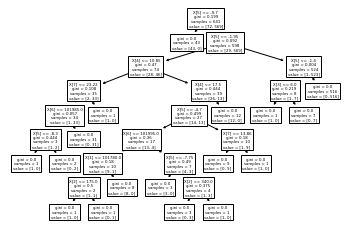

In [56]:
tree.plot_tree(clf)

[Text(0.5928571428571429, 0.9444444444444444, 'X[5] <= -9.7\ngini = 0.199\nsamples = 641\nvalue = [72, 569]'),
 Text(0.5357142857142857, 0.8333333333333334, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.65, 0.8333333333333334, 'X[5] <= -1.95\ngini = 0.092\nsamples = 598\nvalue = [29, 569]'),
 Text(0.4142857142857143, 0.7222222222222222, 'X[4] <= 10.85\ngini = 0.47\nsamples = 74\nvalue = [28, 46]'),
 Text(0.22857142857142856, 0.6111111111111112, 'X[7] <= 23.22\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.17142857142857143, 0.5, 'X[6] <= 101985.0\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.11428571428571428, 0.3888888888888889, 'X[5] <= -8.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05714285714285714, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17142857142857143, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.22857142857142856, 0.3888888888888889, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),


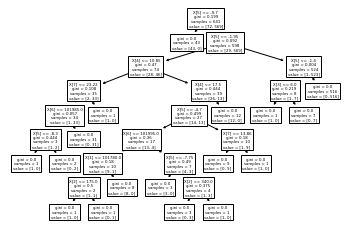

In [57]:
tree.plot_tree(clf)

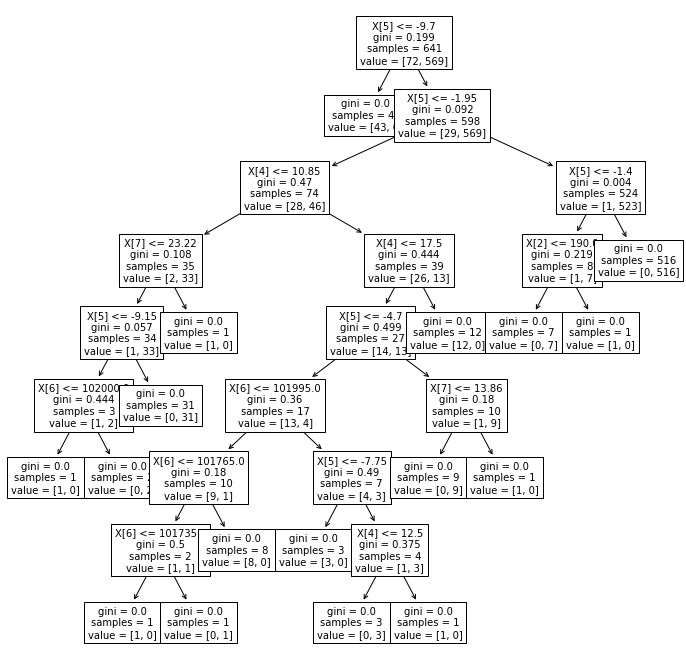

In [68]:
# from sklearn.datasets import load_iris
from sklearn import tree
# iris = load_iris()
clf = humidity_classifier.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

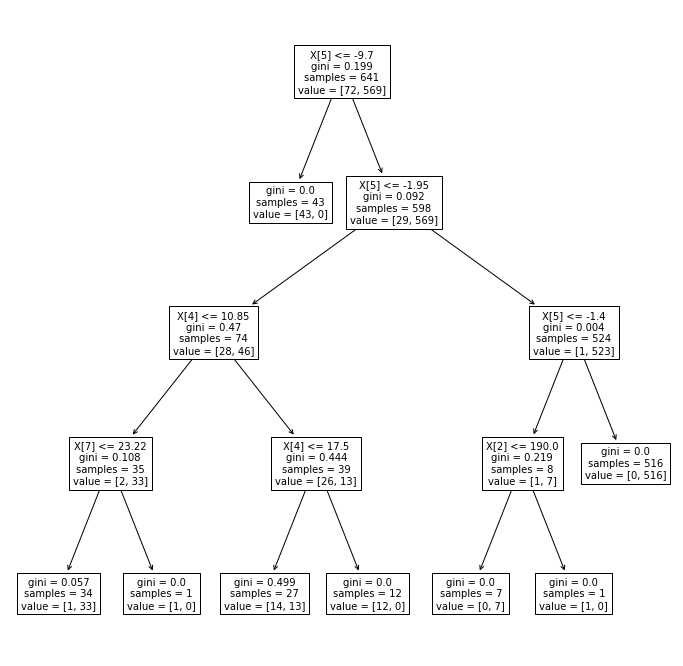

In [67]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
# iris = load_iris(return_X_y=True)
clf = humidity_classifier.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

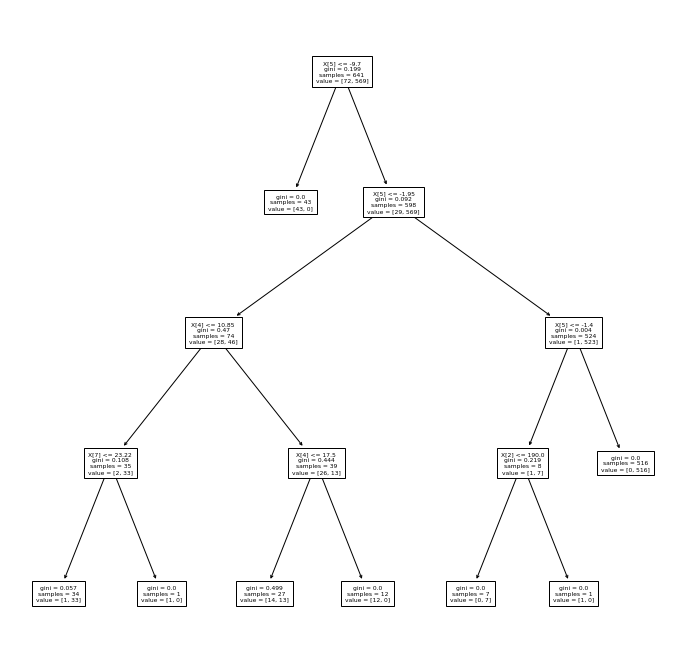

In [62]:
# save plot
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [63]:
humidity_predictions = humidity_classifier.predict(X_test)

In [64]:
print(humidity_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [65]:
y_test['humidity_label'][:10]

400    1
663    1
112    1
289    1
996    1
296    1
89     1
891    1
298    1
351    1
Name: humidity_label, dtype: int32

In [66]:
accuracy_score(y_true = y_test, y_pred = humidity_predictions)

0.9716981132075472

In [76]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred = predictions)

In [ ]:
# create a model to predit the humidity, the prove of accuracy is 97%
# we can use this predit the humidity is higher that 24.99 or not